<a href="https://colab.research.google.com/github/dpshepherd/PHY333_S2024/blob/main/Lab4_RLC_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Paste your data here. Every entry needs to be separated by a comma. See example below

```
f = np.array([30800,
32400,
33000,
33200,
33350,
33500,
33550,
33600,
33700,
33900,
34000,
34090,
34150,
34250,
34400,
34500,
34800,
35500,
37000])

gain = np.array([0.216,
0.433,
0.668,
0.867,
1.02,
1.3,
1.51,
1.78,
1.95,
2.167,
1.95,
1.72,
1.54,
1.3,
1.67,
0.867,
0.65,
0.415,
0.2167])
```

In [235]:
# frequencies here
f = np.array([])


# V_out/V_in here
gain = np.array([])

### Plot of your data

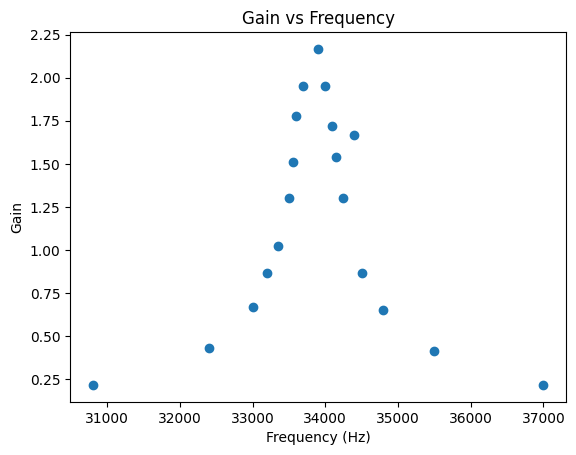

In [236]:
plt.scatter(f,gain)
plt.title('Gain vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()

### Fitting frequency response of an RLC Circuit with Parallel LC

For an RLC circuit with the inductor (L) and capacitor (C) in parallel and the resistor (R) in series, the resonance frequency ($f_0$) is given by:

$$f_0 = \frac{1}{2\pi\sqrt{LC}}$$

### Impedance and Gain

The total impedance ($Z_{total}$) of the circuit is the sum of the resistor's impedance ($R$) and the impedance of the parallel LC combination ($Z_{LC}$), where:

$$Z_{LC} = \left( \frac{1}{j\omega L} + j\omega C \right)^{-1}$$

The voltage gain ($A$) across the LC part can be expressed as:

$$A = \left| \frac{V_{LC}}{V_{in}} \right| = \left| \frac{Z_{LC}}{R + Z_{LC}} \right|$$

### Lorentzian-like Form

The quality factor ($Q$) for a parallel LC circuit is:

$$Q = R \sqrt{\frac{C}{L}}$$

The bandwidth ($\Delta f$) of the resonance is:

$$\Delta f = \frac{f_0}{Q}$$

The gain near the resonance can be approximated by a Lorentzian function:

$$L(f) = \frac{A_0}{1 + \left(\frac{f - f_0}{\Delta f / 2}\right)^2}$$

where $A_0$ is the peak amplitude of the gain at resonance.

In [20]:
from scipy.optimize import curve_fit

In [249]:
# Define the Lorentzian function
def lorentzian(f, f0, gamma, A0, B):
    return B+ A0 / (1 + ((f - f0) / (gamma / 2))**2)

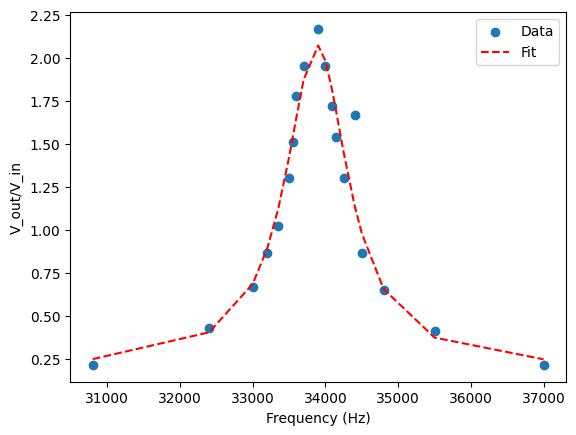

Fitted resonance frequency: 33.88 kHz
Assumed L: 2.2 mH
Calculated C: 0.01 uF
Calculated R: 15.16 kOhms
Calculated Q: 32.38


In [253]:
# Fit the Lorentzian model
params, covariance = curve_fit(lorentzian, f, gain, p0=[34000, 2000, 1, .1])

f0_fit, gamma_fit, A0_fit, B0_fit = params

# Plot the data and the fit
plt.scatter(f, gain, label='Data')
plt.plot(f, lorentzian(f, *params), 'r--', label='Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('V_out/V_in')
plt.legend()
plt.show()

L_assumed = 2.2e-3  # Assumed inductance in Henrys

# Calculate C using the resonance frequency
C_calculated = 1 / ((2 * np.pi * f0_fit)**2 * L_assumed)

# Calculate R using the bandwidth (gamma_fit is the bandwidth in this context)
R_calculated = np.sqrt((f0_fit/gamma_fit)**2*(L_assumed/C_calculated))

print(f"Fitted resonance frequency: {np.round(f0_fit/1e3,2)} kHz")
print(f"Assumed L: {np.round(L_assumed/1e-3,2)} mH")
print(f"Calculated C: {np.round(C_calculated/1e-6,4)} uF")
print(f"Calculated R: {np.round(R_calculated/1e3,2)} kOhms")
print(f"Calculated Q: {np.round(f0_fit/gamma_fit,2)}")